# **Libraries**

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.preprocessing import StandardScaler

from scipy import stats
from mlxtend.preprocessing import minmax_scaling
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from category_encoders import BinaryEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_regression

from IPython.display import display
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor

from scipy import stats

# Import warnings
import warnings
warnings.filterwarnings('ignore')

# **Data Preparation**

## **Data Collection**

In [2]:
# Read csv as a dataframe
df = pd.read_csv("/kaggle/input/loan-data/prosperLoanData.csv")
df

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113932,E6D9357655724827169606C,753087,2013-04-14 05:55:02.663000000,NaN,36,Current,NaN,0.22354,0.1864,0.1764,...,-75.58,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
113933,E6DB353036033497292EE43,537216,2011-11-03 20:42:55.333000000,NaN,36,FinalPaymentInProgress,NaN,0.13220,0.1110,0.1010,...,-30.05,0.0,0.0,0.0,0.0,1.0,0,0,0.0,22
113934,E6E13596170052029692BB1,1069178,2013-12-13 05:49:12.703000000,NaN,60,Current,NaN,0.23984,0.2150,0.2050,...,-16.91,0.0,0.0,0.0,0.0,1.0,0,0,0.0,119
113935,E6EB3531504622671970D9E,539056,2011-11-14 13:18:26.597000000,NaN,60,Completed,2013-08-13 00:00:00,0.28408,0.2605,0.2505,...,-235.05,0.0,0.0,0.0,0.0,1.0,0,0,0.0,274


In [3]:
# Take first 5 rows
df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


## **Data Exploration**

In [4]:
df.shape

(113937, 81)

In [5]:
# Column information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [6]:
# Statistics of dataset
df.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,...,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,...,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,...,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,...,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,0.124200,0.115670,0.042400,0.074080,3.000000,4.000000,...,-73.180000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,6.005540e+05,36.000000,0.209760,0.184000,0.173000,0.161500,0.072400,0.091700,4.000000,6.000000,...,-34.440000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,8.926340e+05,36.000000,0.283810,0.250000,0.240000,0.224300,0.112000,0.116600,5.000000,8.000000,...,-13.920000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,11.000000,...,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000,33.000000,25000.000000,1189.000000


# **Data Cleaning**

**Changing Loan Orgination Date into date time format**

In [7]:
df['LoanOriginationDate'] = pd.to_datetime(df['LoanOriginationDate'])
df['LoanOriginationDate']

0        2007-09-12
1        2014-03-03
2        2007-01-17
3        2012-11-01
4        2013-09-20
            ...    
113932   2013-04-22
113933   2011-11-07
113934   2013-12-23
113935   2011-11-21
113936   2014-01-21
Name: LoanOriginationDate, Length: 113937, dtype: datetime64[ns]

In [8]:
# Assuming the reference date is '2009-08-14 00:00:00'
reference_date = pd.to_datetime('2009-08-14 00:00:00')

# Convert the date-time column, allowing format inference
df['ListingCreationDate'] = pd.to_datetime(df['ListingCreationDate'], format='infer', errors='coerce')

# Calculate the number of days since the reference date
df['DaysSinceCreation'] = (df['ListingCreationDate'] - reference_date).dt.days
df['DaysSinceCreation']

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
          ..
113932   NaN
113933   NaN
113934   NaN
113935   NaN
113936   NaN
Name: DaysSinceCreation, Length: 113937, dtype: float64

In [9]:
#checking the captalization
df['LoanStatus'].value_counts(dropna=False)

LoanStatus
Current                   56576
Completed                 38074
Chargedoff                11992
Defaulted                  5018
Past Due (1-15 days)        806
Past Due (31-60 days)       363
Past Due (61-90 days)       313
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      205
Past Due (>120 days)         16
Cancelled                     5
Name: count, dtype: int64

In [10]:
# Check if there are any wrong entries like symbols -,?,#,* and so om.
for col in df.columns:
    print('{}:{}'.format(col,df[col].unique()))

ListingKey:['1021339766868145413AB3B' '10273602499503308B223C1'
 '0EE9337825851032864889A' ... 'E6E13596170052029692BB1'
 'E6EB3531504622671970D9E' 'E6ED3600409833199F711B7']
ListingNumber:[ 193129 1209647   81716 ... 1069178  539056 1140093]
ListingCreationDate:<DatetimeArray>
['NaT']
Length: 1, dtype: datetime64[ns]
CreditGrade:['C' nan 'HR' 'AA' 'D' 'B' 'E' 'A' 'NC']
Term:[36 60 12]
LoanStatus:['Completed' 'Current' 'Past Due (1-15 days)' 'Defaulted' 'Chargedoff'
 'Past Due (16-30 days)' 'Cancelled' 'Past Due (61-90 days)'
 'Past Due (31-60 days)' 'Past Due (91-120 days)' 'FinalPaymentInProgress'
 'Past Due (>120 days)']
ClosedDate:['2009-08-14 00:00:00' nan '2009-12-17 00:00:00' ... '2006-10-25 00:00:00'
 '2005-12-08 00:00:00' '2005-11-25 00:00:00']
BorrowerAPR:[0.16516 0.12016 0.28269 ... 0.22674 0.3477  0.19543]
BorrowerRate:[0.158  0.092  0.275  ... 0.2037 0.2309 0.0739]
LenderYield:[0.138  0.082  0.24   ... 0.0494 0.2209 0.0579]
EstimatedEffectiveYield:[   nan 0.0796 0.0849 ...

# **Handling Missing Values**

In [11]:
# Check the Null Values
df.isnull().sum()

ListingKey                          0
ListingNumber                       0
ListingCreationDate            113937
CreditGrade                     84984
Term                                0
                                ...  
Recommendations                     0
InvestmentFromFriendsCount          0
InvestmentFromFriendsAmount         0
Investors                           0
DaysSinceCreation              113937
Length: 82, dtype: int64

## **Finding any duplicate values**

In [12]:
# Duplicates data entry in this data
df.duplicated().sum()

0

There's no duplicate values

## **Data type conversion**

Taking as separate like categorical and numerical.

In [13]:
categorical=df.select_dtypes("object")
categorical

,ListingKey,CreditGrade,LoanStatus,ClosedDate,ProsperRating (Alpha),BorrowerState,Occupation,EmploymentStatus,GroupKey,DateCreditPulled,FirstRecordedCreditLine,IncomeRange,LoanKey,LoanOriginationQuarter,MemberKey
0,1021339766868145413AB3B,C,Completed,2009-08-14 00:00:00,NaN,CO,Other,Self-employed,NaN,2007-08-26 18:41:46.780000000,2001-10-11 00:00:00,"$25,000-49,999",E33A3400205839220442E84,Q3 2007,1F3E3376408759268057EDA
1,10273602499503308B223C1,NaN,Current,NaN,A,CO,Professional,Employed,NaN,2014-02-27 08:28:14,1996-03-18 00:00:00,"$50,000-74,999",9E3B37071505919926B1D82,Q1 2014,1D13370546739025387B2F4
2,0EE9337825851032864889A,HR,Completed,2009-12-17 00:00:00,NaN,GA,Other,Not available,783C3371218786870A73D20,2007-01-02 14:09:10.060000000,2002-07-27 00:00:00,Not displayed,6954337960046817851BCB2,Q1 2007,5F7033715035555618FA612
3,0EF5356002482715299901A,NaN,Current,NaN,A,GA,Skilled Labor,Employed,NaN,2012-10-22 11:02:32,1983-02-28 00:00:00,"$25,000-49,999",A0393664465886295619C51,Q4 2012,9ADE356069835475068C6D2
4,0F023589499656230C5E3E2,NaN,Current,NaN,D,MN,Executive,Employed,NaN,2013-09-14 18:38:44,2004-02-20 00:00:00,"$100,000+",A180369302188889200689E,Q3 2013,36CE356043264555721F06C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113932,E6D9357655724827169606C,NaN,Current,NaN,C,IL,Food Service Management,Employed,NaN,2013-04-14 05:54:58,1997-09-01 00:00:00,"$50,000-74,999",9BD7367919051593140DB62,Q2 2013,2EC435768441332602FDC15
113933,E6DB353036033497292EE43,NaN,FinalPaymentInProgress,NaN,A,PA,Professional,Employed,NaN,2011-11-03 20:42:53,1992-01-17 00:00:00,"$75,000-99,999",62D93634569816897D5A276,Q4 2011,55C4336679182766893E4FC
113934,E6E13596170052029692BB1,NaN,Current,NaN,D,TX,Other,Employed,NaN,2013-12-13 05:49:15,2002-02-25 00:00:00,"$25,000-49,999",DD1A370200396006300ACA0,Q4 2013,0FE0370029359765342FDB5
113935,E6EB3531504622671970D9E,NaN,Completed,2013-08-13 00:00:00,C,GA,Food Service,Full-time,NaN,2011-11-14 13:18:24,1993-12-01 00:00:00,"$25,000-49,999",589536350469116027ED11B,Q4 2011,A33834861822272782621C8


In [14]:
categorical.isna().sum()

ListingKey                      0
CreditGrade                 84984
LoanStatus                      0
ClosedDate                  58848
ProsperRating (Alpha)       29084
BorrowerState                5515
Occupation                   3588
EmploymentStatus             2255
GroupKey                   100596
DateCreditPulled                0
FirstRecordedCreditLine       697
IncomeRange                     0
LoanKey                         0
LoanOriginationQuarter          0
MemberKey                       0
dtype: int64

In [15]:
categorical=categorical.fillna(categorical.mode().iloc[0])
categorical

,ListingKey,CreditGrade,LoanStatus,ClosedDate,ProsperRating (Alpha),BorrowerState,Occupation,EmploymentStatus,GroupKey,DateCreditPulled,FirstRecordedCreditLine,IncomeRange,LoanKey,LoanOriginationQuarter,MemberKey
0,1021339766868145413AB3B,C,Completed,2009-08-14 00:00:00,C,CO,Other,Self-employed,783C3371218786870A73D20,2007-08-26 18:41:46.780000000,2001-10-11 00:00:00,"$25,000-49,999",E33A3400205839220442E84,Q3 2007,1F3E3376408759268057EDA
1,10273602499503308B223C1,C,Current,2014-03-04 00:00:00,A,CO,Professional,Employed,783C3371218786870A73D20,2014-02-27 08:28:14,1996-03-18 00:00:00,"$50,000-74,999",9E3B37071505919926B1D82,Q1 2014,1D13370546739025387B2F4
2,0EE9337825851032864889A,HR,Completed,2009-12-17 00:00:00,C,GA,Other,Not available,783C3371218786870A73D20,2007-01-02 14:09:10.060000000,2002-07-27 00:00:00,Not displayed,6954337960046817851BCB2,Q1 2007,5F7033715035555618FA612
3,0EF5356002482715299901A,C,Current,2014-03-04 00:00:00,A,GA,Skilled Labor,Employed,783C3371218786870A73D20,2012-10-22 11:02:32,1983-02-28 00:00:00,"$25,000-49,999",A0393664465886295619C51,Q4 2012,9ADE356069835475068C6D2
4,0F023589499656230C5E3E2,C,Current,2014-03-04 00:00:00,D,MN,Executive,Employed,783C3371218786870A73D20,2013-09-14 18:38:44,2004-02-20 00:00:00,"$100,000+",A180369302188889200689E,Q3 2013,36CE356043264555721F06C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113932,E6D9357655724827169606C,C,Current,2014-03-04 00:00:00,C,IL,Food Service Management,Employed,783C3371218786870A73D20,2013-04-14 05:54:58,1997-09-01 00:00:00,"$50,000-74,999",9BD7367919051593140DB62,Q2 2013,2EC435768441332602FDC15
113933,E6DB353036033497292EE43,C,FinalPaymentInProgress,2014-03-04 00:00:00,A,PA,Professional,Employed,783C3371218786870A73D20,2011-11-03 20:42:53,1992-01-17 00:00:00,"$75,000-99,999",62D93634569816897D5A276,Q4 2011,55C4336679182766893E4FC
113934,E6E13596170052029692BB1,C,Current,2014-03-04 00:00:00,D,TX,Other,Employed,783C3371218786870A73D20,2013-12-13 05:49:15,2002-02-25 00:00:00,"$25,000-49,999",DD1A370200396006300ACA0,Q4 2013,0FE0370029359765342FDB5
113935,E6EB3531504622671970D9E,C,Completed,2013-08-13 00:00:00,C,GA,Food Service,Full-time,783C3371218786870A73D20,2011-11-14 13:18:24,1993-12-01 00:00:00,"$25,000-49,999",589536350469116027ED11B,Q4 2011,A33834861822272782621C8


In [16]:
numerical=df.select_dtypes("number")
numerical

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors,DaysSinceCreation
0,193129,36,0.16516,0.1580,0.1380,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258,NaN
1,1209647,36,0.12016,0.0920,0.0820,0.07960,0.0249,0.05470,6.0,7.0,...,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1,NaN
2,81716,36,0.28269,0.2750,0.2400,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41,NaN
3,658116,36,0.12528,0.0974,0.0874,0.08490,0.0249,0.06000,6.0,9.0,...,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158,NaN
4,909464,36,0.24614,0.2085,0.1985,0.18316,0.0925,0.09066,3.0,4.0,...,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113932,753087,36,0.22354,0.1864,0.1764,0.16490,0.0699,0.09500,4.0,5.0,...,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1,NaN
113933,537216,36,0.13220,0.1110,0.1010,0.10070,0.0200,0.08070,6.0,8.0,...,0.0,0.0,0.0,0.0,1.0,0,0,0.0,22,NaN
113934,1069178,60,0.23984,0.2150,0.2050,0.18828,0.1025,0.08578,3.0,3.0,...,0.0,0.0,0.0,0.0,1.0,0,0,0.0,119,NaN
113935,539056,60,0.28408,0.2605,0.2505,0.24450,0.0850,0.15950,4.0,5.0,...,0.0,0.0,0.0,0.0,1.0,0,0,0.0,274,NaN


In [17]:
numerical.isna().sum()

ListingNumber                       0
Term                                0
BorrowerAPR                        25
BorrowerRate                        0
LenderYield                         0
                                ...  
Recommendations                     0
InvestmentFromFriendsCount          0
InvestmentFromFriendsAmount         0
Investors                           0
DaysSinceCreation              113937
Length: 62, dtype: int64

In [18]:
numerical=numerical.fillna(numerical.median().iloc[0])
numerical

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors,DaysSinceCreation
0,193129,36,0.16516,0.1580,0.1380,600554.00000,600554.0000,600554.00000,600554.0,600554.0,...,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258,600554.0
1,1209647,36,0.12016,0.0920,0.0820,0.07960,0.0249,0.05470,6.0,7.0,...,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1,600554.0
2,81716,36,0.28269,0.2750,0.2400,600554.00000,600554.0000,600554.00000,600554.0,600554.0,...,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41,600554.0
3,658116,36,0.12528,0.0974,0.0874,0.08490,0.0249,0.06000,6.0,9.0,...,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158,600554.0
4,909464,36,0.24614,0.2085,0.1985,0.18316,0.0925,0.09066,3.0,4.0,...,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20,600554.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113932,753087,36,0.22354,0.1864,0.1764,0.16490,0.0699,0.09500,4.0,5.0,...,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1,600554.0
113933,537216,36,0.13220,0.1110,0.1010,0.10070,0.0200,0.08070,6.0,8.0,...,0.0,0.0,0.0,0.0,1.0,0,0,0.0,22,600554.0
113934,1069178,60,0.23984,0.2150,0.2050,0.18828,0.1025,0.08578,3.0,3.0,...,0.0,0.0,0.0,0.0,1.0,0,0,0.0,119,600554.0
113935,539056,60,0.28408,0.2605,0.2505,0.24450,0.0850,0.15950,4.0,5.0,...,0.0,0.0,0.0,0.0,1.0,0,0,0.0,274,600554.0


After filling the values of na's. Let's combine both categorical and numerical into a result.

In [19]:
result = pd.concat([numerical, categorical], axis=1, join='inner')
result

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,BorrowerState,Occupation,EmploymentStatus,GroupKey,DateCreditPulled,FirstRecordedCreditLine,IncomeRange,LoanKey,LoanOriginationQuarter,MemberKey
0,193129,36,0.16516,0.1580,0.1380,600554.00000,600554.0000,600554.00000,600554.0,600554.0,...,CO,Other,Self-employed,783C3371218786870A73D20,2007-08-26 18:41:46.780000000,2001-10-11 00:00:00,"$25,000-49,999",E33A3400205839220442E84,Q3 2007,1F3E3376408759268057EDA
1,1209647,36,0.12016,0.0920,0.0820,0.07960,0.0249,0.05470,6.0,7.0,...,CO,Professional,Employed,783C3371218786870A73D20,2014-02-27 08:28:14,1996-03-18 00:00:00,"$50,000-74,999",9E3B37071505919926B1D82,Q1 2014,1D13370546739025387B2F4
2,81716,36,0.28269,0.2750,0.2400,600554.00000,600554.0000,600554.00000,600554.0,600554.0,...,GA,Other,Not available,783C3371218786870A73D20,2007-01-02 14:09:10.060000000,2002-07-27 00:00:00,Not displayed,6954337960046817851BCB2,Q1 2007,5F7033715035555618FA612
3,658116,36,0.12528,0.0974,0.0874,0.08490,0.0249,0.06000,6.0,9.0,...,GA,Skilled Labor,Employed,783C3371218786870A73D20,2012-10-22 11:02:32,1983-02-28 00:00:00,"$25,000-49,999",A0393664465886295619C51,Q4 2012,9ADE356069835475068C6D2
4,909464,36,0.24614,0.2085,0.1985,0.18316,0.0925,0.09066,3.0,4.0,...,MN,Executive,Employed,783C3371218786870A73D20,2013-09-14 18:38:44,2004-02-20 00:00:00,"$100,000+",A180369302188889200689E,Q3 2013,36CE356043264555721F06C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113932,753087,36,0.22354,0.1864,0.1764,0.16490,0.0699,0.09500,4.0,5.0,...,IL,Food Service Management,Employed,783C3371218786870A73D20,2013-04-14 05:54:58,1997-09-01 00:00:00,"$50,000-74,999",9BD7367919051593140DB62,Q2 2013,2EC435768441332602FDC15
113933,537216,36,0.13220,0.1110,0.1010,0.10070,0.0200,0.08070,6.0,8.0,...,PA,Professional,Employed,783C3371218786870A73D20,2011-11-03 20:42:53,1992-01-17 00:00:00,"$75,000-99,999",62D93634569816897D5A276,Q4 2011,55C4336679182766893E4FC
113934,1069178,60,0.23984,0.2150,0.2050,0.18828,0.1025,0.08578,3.0,3.0,...,TX,Other,Employed,783C3371218786870A73D20,2013-12-13 05:49:15,2002-02-25 00:00:00,"$25,000-49,999",DD1A370200396006300ACA0,Q4 2013,0FE0370029359765342FDB5
113935,539056,60,0.28408,0.2605,0.2505,0.24450,0.0850,0.15950,4.0,5.0,...,GA,Food Service,Full-time,783C3371218786870A73D20,2011-11-14 13:18:24,1993-12-01 00:00:00,"$25,000-49,999",589536350469116027ED11B,Q4 2011,A33834861822272782621C8


In [20]:
result.head()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,BorrowerState,Occupation,EmploymentStatus,GroupKey,DateCreditPulled,FirstRecordedCreditLine,IncomeRange,LoanKey,LoanOriginationQuarter,MemberKey
0,193129,36,0.16516,0.1580,0.1380,600554.00000,600554.0000,600554.00000,600554.0,600554.0,...,CO,Other,Self-employed,783C3371218786870A73D20,2007-08-26 18:41:46.780000000,2001-10-11 00:00:00,"$25,000-49,999",E33A3400205839220442E84,Q3 2007,1F3E3376408759268057EDA
1,1209647,36,0.12016,0.0920,0.0820,0.07960,0.0249,0.05470,6.0,7.0,...,CO,Professional,Employed,783C3371218786870A73D20,2014-02-27 08:28:14,1996-03-18 00:00:00,"$50,000-74,999",9E3B37071505919926B1D82,Q1 2014,1D13370546739025387B2F4
2,81716,36,0.28269,0.2750,0.2400,600554.00000,600554.0000,600554.00000,600554.0,600554.0,...,GA,Other,Not available,783C3371218786870A73D20,2007-01-02 14:09:10.060000000,2002-07-27 00:00:00,Not displayed,6954337960046817851BCB2,Q1 2007,5F7033715035555618FA612
3,658116,36,0.12528,0.0974,0.0874,0.08490,0.0249,0.06000,6.0,9.0,...,GA,Skilled Labor,Employed,783C3371218786870A73D20,2012-10-22 11:02:32,1983-02-28 00:00:00,"$25,000-49,999",A0393664465886295619C51,Q4 2012,9ADE356069835475068C6D2
4,909464,36,0.24614,0.2085,0.1985,0.18316,0.0925,0.09066,3.0,4.0,...,MN,Executive,Employed,783C3371218786870A73D20,2013-09-14 18:38:44,2004-02-20 00:00:00,"$100,000+",A180369302188889200689E,Q3 2013,36CE356043264555721F06C


In [21]:
result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 77 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingNumber                        113937 non-null  int64  
 1   Term                                 113937 non-null  int64  
 2   BorrowerAPR                          113937 non-null  float64
 3   BorrowerRate                         113937 non-null  float64
 4   LenderYield                          113937 non-null  float64
 5   EstimatedEffectiveYield              113937 non-null  float64
 6   EstimatedLoss                        113937 non-null  float64
 7   EstimatedReturn                      113937 non-null  float64
 8   ProsperRating (numeric)              113937 non-null  float64
 9   ProsperScore                         113937 non-null  float64
 10  ListingCategory (numeric)            113937 non-null  int64  
 11  EmploymentSta

In [22]:
result.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors,DaysSinceCreation
count,1.139370e+05,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,...,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.0
mean,6.278857e+05,40.830248,131.992040,0.192764,0.182701,153299.866132,153299.800330,153299.812069,153302.773269,153304.171753,...,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228,600554.0
std,3.280762e+05,10.436212,8894.955388,0.074818,0.074516,261848.286590,261848.325114,261848.318241,261846.584588,261845.765840,...,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020,0.0
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,...,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000,600554.0
25%,4.009190e+05,36.000000,0.156290,0.134000,0.124200,0.132600,0.054900,0.080220,3.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000,600554.0
50%,6.005540e+05,36.000000,0.209790,0.184000,0.173000,0.195710,0.099000,0.109300,5.000000,7.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000,600554.0
75%,8.926340e+05,36.000000,0.283860,0.250000,0.240000,600554.000000,600554.000000,600554.000000,600554.000000,600554.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000,600554.0
max,1.255725e+06,60.000000,600554.000000,0.497500,0.492500,600554.000000,600554.000000,600554.000000,600554.000000,600554.000000,...,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000,33.000000,25000.000000,1189.000000,600554.0


In [23]:
result.isna().sum()

ListingNumber              0
Term                       0
BorrowerAPR                0
BorrowerRate               0
LenderYield                0
                          ..
FirstRecordedCreditLine    0
IncomeRange                0
LoanKey                    0
LoanOriginationQuarter     0
MemberKey                  0
Length: 77, dtype: int64

<Axes: >

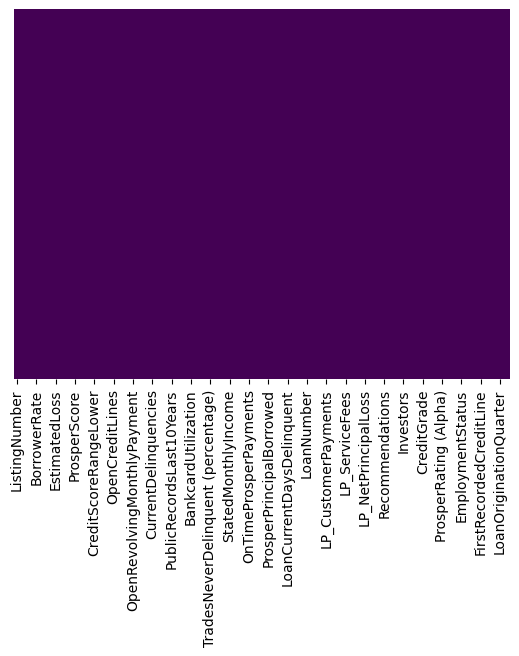

In [24]:
sns.heatmap(result.isnull(),yticklabels=False,cbar=False,cmap='viridis')

We saw that our dataset is now has no any missing values.

# **Outliers**

## **Z-score Method**

Text(0.5, 1.0, 'BorrowerRate')

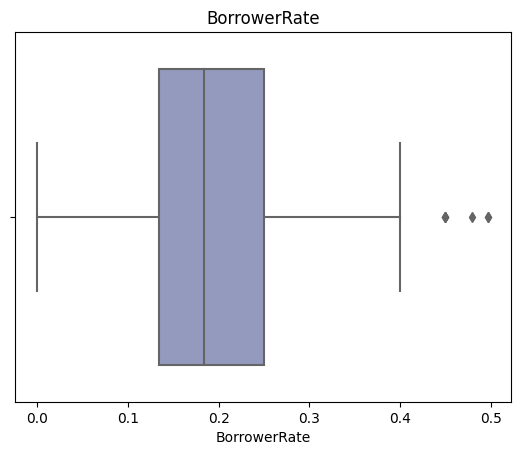

In [25]:
# Box plot for Loan Status to see outliers
sns.boxplot(x=result['BorrowerRate'], palette='BuPu')
plt.title('BorrowerRate')

In [26]:
# Removng Outliers
def outliers(result, feature):
    Q1 = result[feature].quantile(0.25)
    Q3 = result[feature].quantile(0.75)
    IQR = Q3-Q1
    upper_limit = Q3 + 1.5 * IQR
    lower_limit = Q1 - 1.5 * IQR
    return upper_limit, lower_limit

upper, lower = outliers(result, "BorrowerRate")
print("Upper whisker: ",upper)
print("Lower whisker: ",lower)
data=df[(result['BorrowerRate']>lower) & (result['BorrowerRate']<upper)]

Upper whisker:  0.424
Lower whisker:  -0.03999999999999998


In [27]:
if 'BorrowerRate' in data.columns:
    print("True")
else:
    print("False")

True


Text(0.5, 1.0, 'BorrowerRate after removing outliers')

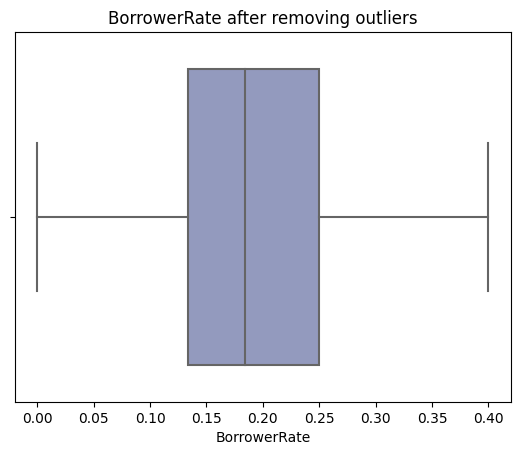

In [28]:
# Item_Outlet_Sales after removing outliers
sns.boxplot(x=data['BorrowerRate'], palette='BuPu')
plt.title('BorrowerRate after removing outliers')

## **Data Scaling and Normalization**

**Scaling**

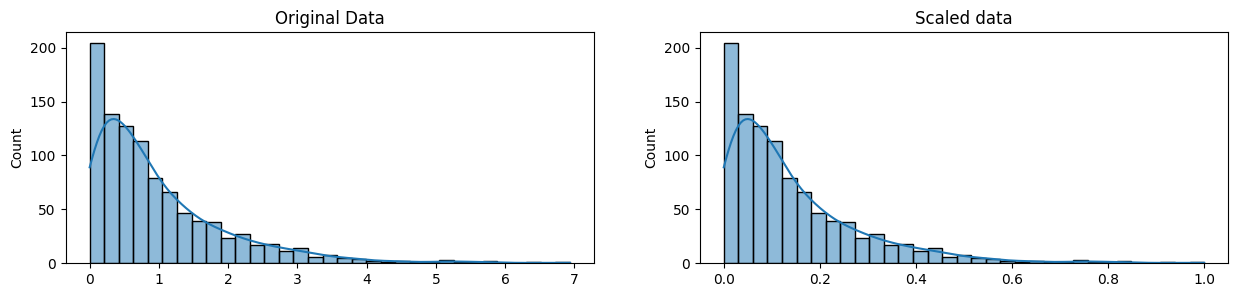

In [29]:
#  Standardization (Scaling):
original_data = np.random.exponential(size=1000)
# mix-max scale the data between 0 and 1
scaled_data = minmax_scaling(original_data, columns=[0])

# plot both together to compare
fig, ax = plt.subplots(1, 2, figsize=(15, 3))
sns.histplot(original_data, ax=ax[0], kde=True, legend=False)
ax[0].set_title("Original Data")
sns.histplot(scaled_data, ax=ax[1], kde=True, legend=False)
ax[1].set_title("Scaled data")
plt.show()

**Normalization**

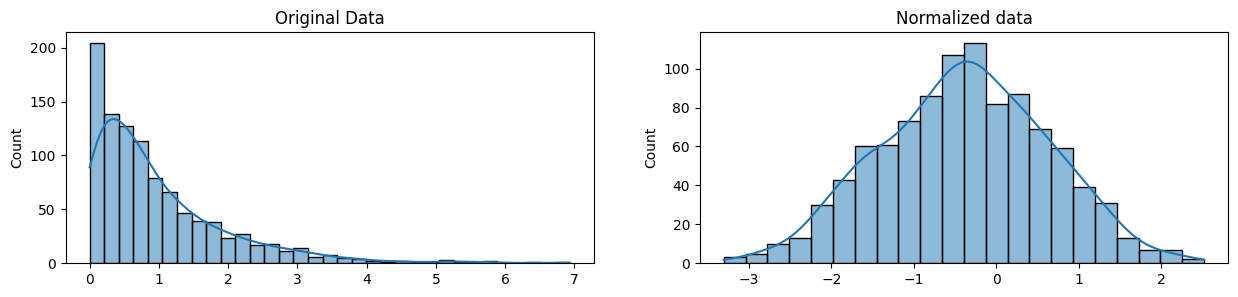

In [30]:
# normalize the exponential data with boxcox
normalized_data = stats.boxcox(original_data)

# plot both together to compare
fig, ax=plt.subplots(1, 2, figsize=(15, 3))
sns.histplot(original_data, ax=ax[0], kde=True, legend=False)
ax[0].set_title("Original Data")
sns.histplot(normalized_data[0], ax=ax[1], kde=True, legend=False)
ax[1].set_title("Normalized data")
plt.show()

In [31]:
df_loan = result.copy()
df_loan.columns

Index(['ListingNumber', 'Term', 'BorrowerAPR', 'BorrowerRate', 'LenderYield',
       'EstimatedEffectiveYield', 'EstimatedLoss', 'EstimatedReturn',
       'ProsperRating (numeric)', 'ProsperScore', 'ListingCategory (numeric)',
       'EmploymentStatusDuration', 'CreditScoreRangeLower',
       'CreditScoreRangeUpper', 'CurrentCreditLines', 'OpenCreditLines',
       'TotalCreditLinespast7years', 'OpenRevolvingAccounts',
       'OpenRevolvingMonthlyPayment', 'InquiriesLast6Months', 'TotalInquiries',
       'CurrentDelinquencies', 'AmountDelinquent', 'DelinquenciesLast7Years',
       'PublicRecordsLast10Years', 'PublicRecordsLast12Months',
       'RevolvingCreditBalance', 'BankcardUtilization',
       'AvailableBankcardCredit', 'TotalTrades',
       'TradesNeverDelinquent (percentage)', 'TradesOpenedLast6Months',
       'DebtToIncomeRatio', 'StatedMonthlyIncome', 'TotalProsperLoans',
       'TotalProsperPaymentsBilled', 'OnTimeProsperPayments',
       'ProsperPaymentsLessThanOneMonthLate',

In [32]:
### Dropping column
df_loan.drop(['GroupKey','CreditGrade','ProsperPrincipalBorrowed','ProsperPrincipalOutstanding','EstimatedEffectiveYield','EstimatedLoss','EstimatedReturn','ProsperRating (numeric)',
        'TotalProsperLoans','TotalProsperPaymentsBilled','OnTimeProsperPayments','ProsperPaymentsLessThanOneMonthLate','ProsperPaymentsOneMonthPlusLate','ListingKey'], axis =1, inplace = True)
df_loan.head()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,ProsperScore,ListingCategory (numeric),EmploymentStatusDuration,CreditScoreRangeLower,CreditScoreRangeUpper,...,ProsperRating (Alpha),BorrowerState,Occupation,EmploymentStatus,DateCreditPulled,FirstRecordedCreditLine,IncomeRange,LoanKey,LoanOriginationQuarter,MemberKey
0,193129,36,0.16516,0.1580,0.1380,600554.0,0,2.0,640.0,659.0,...,C,CO,Other,Self-employed,2007-08-26 18:41:46.780000000,2001-10-11 00:00:00,"$25,000-49,999",E33A3400205839220442E84,Q3 2007,1F3E3376408759268057EDA
1,1209647,36,0.12016,0.0920,0.0820,7.0,2,44.0,680.0,699.0,...,A,CO,Professional,Employed,2014-02-27 08:28:14,1996-03-18 00:00:00,"$50,000-74,999",9E3B37071505919926B1D82,Q1 2014,1D13370546739025387B2F4
2,81716,36,0.28269,0.2750,0.2400,600554.0,0,600554.0,480.0,499.0,...,C,GA,Other,Not available,2007-01-02 14:09:10.060000000,2002-07-27 00:00:00,Not displayed,6954337960046817851BCB2,Q1 2007,5F7033715035555618FA612
3,658116,36,0.12528,0.0974,0.0874,9.0,16,113.0,800.0,819.0,...,A,GA,Skilled Labor,Employed,2012-10-22 11:02:32,1983-02-28 00:00:00,"$25,000-49,999",A0393664465886295619C51,Q4 2012,9ADE356069835475068C6D2
4,909464,36,0.24614,0.2085,0.1985,4.0,2,44.0,680.0,699.0,...,D,MN,Executive,Employed,2013-09-14 18:38:44,2004-02-20 00:00:00,"$100,000+",A180369302188889200689E,Q3 2013,36CE356043264555721F06C


In [33]:
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 63 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   ListingNumber                       113937 non-null  int64  
 1   Term                                113937 non-null  int64  
 2   BorrowerAPR                         113937 non-null  float64
 3   BorrowerRate                        113937 non-null  float64
 4   LenderYield                         113937 non-null  float64
 5   ProsperScore                        113937 non-null  float64
 6   ListingCategory (numeric)           113937 non-null  int64  
 7   EmploymentStatusDuration            113937 non-null  float64
 8   CreditScoreRangeLower               113937 non-null  float64
 9   CreditScoreRangeUpper               113937 non-null  float64
 10  CurrentCreditLines                  113937 non-null  float64
 11  OpenCreditLines           

# **Data Encoding**

## **One-Hot Encoding**

In [34]:
# define example
data = np.array(['PercentFunded', 'PercentFunded', 'Investors', 'PercentFunded', '  LoanNumber', '  LoanNumber', 'Investors', 'PercentFunded', 'Investors', '  LoanNumber'])

# integer encode
label_encoder = LabelEncoder()

#fit and transform the data
integer_encoded = label_encoder.fit_transform(data)
print(integer_encoded)

# one-hot encode
onehot_encoder = OneHotEncoder(sparse=False)

#reshape the data
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)

#fit and transform the data
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)

print(onehot_encoded)

[2 2 1 2 0 0 1 2 1 0]
[[0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]]


In [35]:
# Apply One Hot Encodeing 
ohe = ['LoanStatus','EmploymentStatus','IncomeRange']
df_ohe = pd.get_dummies(result, columns=ohe)
df_ohe.head()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,EmploymentStatus_Retired,EmploymentStatus_Self-employed,IncomeRange_$0,"IncomeRange_$1-24,999","IncomeRange_$100,000+","IncomeRange_$25,000-49,999","IncomeRange_$50,000-74,999","IncomeRange_$75,000-99,999",IncomeRange_Not displayed,IncomeRange_Not employed
0,193129,36,0.16516,0.1580,0.1380,600554.00000,600554.0000,600554.00000,600554.0,600554.0,...,False,True,False,False,False,True,False,False,False,False
1,1209647,36,0.12016,0.0920,0.0820,0.07960,0.0249,0.05470,6.0,7.0,...,False,False,False,False,False,False,True,False,False,False
2,81716,36,0.28269,0.2750,0.2400,600554.00000,600554.0000,600554.00000,600554.0,600554.0,...,False,False,False,False,False,False,False,False,True,False
3,658116,36,0.12528,0.0974,0.0874,0.08490,0.0249,0.06000,6.0,9.0,...,False,False,False,False,False,True,False,False,False,False
4,909464,36,0.24614,0.2085,0.1985,0.18316,0.0925,0.09066,3.0,4.0,...,False,False,False,False,True,False,False,False,False,False


In [36]:
columns_to_encode = ['ProsperRating (Alpha)', 'BorrowerState', 'Occupation', 'LoanOriginationDate'
                           ,'LoanOriginationQuarter','MemberKey']

## **Label Encoding**

In [37]:
print(df_loan.columns)

Index(['ListingNumber', 'Term', 'BorrowerAPR', 'BorrowerRate', 'LenderYield',
       'ProsperScore', 'ListingCategory (numeric)', 'EmploymentStatusDuration',
       'CreditScoreRangeLower', 'CreditScoreRangeUpper', 'CurrentCreditLines',
       'OpenCreditLines', 'TotalCreditLinespast7years',
       'OpenRevolvingAccounts', 'OpenRevolvingMonthlyPayment',
       'InquiriesLast6Months', 'TotalInquiries', 'CurrentDelinquencies',
       'AmountDelinquent', 'DelinquenciesLast7Years',
       'PublicRecordsLast10Years', 'PublicRecordsLast12Months',
       'RevolvingCreditBalance', 'BankcardUtilization',
       'AvailableBankcardCredit', 'TotalTrades',
       'TradesNeverDelinquent (percentage)', 'TradesOpenedLast6Months',
       'DebtToIncomeRatio', 'StatedMonthlyIncome',
       'ScorexChangeAtTimeOfListing', 'LoanCurrentDaysDelinquent',
       'LoanFirstDefaultedCycleNumber', 'LoanMonthsSinceOrigination',
       'LoanNumber', 'LoanOriginalAmount', 'MonthlyLoanPayment',
       'LP_CustomerPaym

In [38]:
le = LabelEncoder()
cols = ['LoanStatus','ClosedDate','ProsperRating (Alpha)','BorrowerState','Occupation','EmploymentStatus','FirstRecordedCreditLine',
       'DateCreditPulled','IncomeRange','LoanKey','LoanOriginationQuarter',
       'MemberKey']

df_loan[cols] = df_loan[cols].apply(LabelEncoder().fit_transform)

In [39]:
df_loan.head()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,ProsperScore,ListingCategory (numeric),EmploymentStatusDuration,CreditScoreRangeLower,CreditScoreRangeUpper,...,ProsperRating (Alpha),BorrowerState,Occupation,EmploymentStatus,DateCreditPulled,FirstRecordedCreditLine,IncomeRange,LoanKey,LoanOriginationQuarter,MemberKey
0,193129,36,0.16516,0.1580,0.1380,600554.0,0,2.0,640.0,659.0,...,3,5,35,7,14346,8637,3,100336,17,11070
1,1209647,36,0.12016,0.0920,0.0820,7.0,2,44.0,680.0,699.0,...,0,5,41,0,111882,6615,4,69836,7,10301
2,81716,36,0.28269,0.2750,0.2400,600554.0,0,600554.0,480.0,499.0,...,3,10,35,2,6445,8925,6,46302,1,33780
3,658116,36,0.12528,0.0974,0.0874,9.0,16,113.0,800.0,819.0,...,0,10,50,0,64723,2245,3,70775,31,54938
4,909464,36,0.24614,0.2085,0.1985,4.0,2,44.0,680.0,699.0,...,4,23,19,0,85856,9496,2,71386,23,19464


In [40]:
# Check unique values in the target column
result['LoanStatus'].value_counts()

# Perform label encoding
le = LabelEncoder()
result['Loan_Status_encoded'] = le.fit_transform(result['LoanStatus'])

# Display the encoded target columnsz
result[['LoanStatus', 'Loan_Status_encoded']].head()

,LoanStatus,Loan_Status_encoded
0,Completed,2
1,Current,3
2,Completed,2
3,Current,3
4,Current,3


## **Binary Encoding**

In [41]:
# Initialize the binary encoder
binary_encoder = BinaryEncoder(cols=["LoanStatus"])

# Apply the binary encoding to the selected column
df_encoded = binary_encoder.fit_transform(result)
df_encoded

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,Occupation,EmploymentStatus,GroupKey,DateCreditPulled,FirstRecordedCreditLine,IncomeRange,LoanKey,LoanOriginationQuarter,MemberKey,Loan_Status_encoded
0,193129,36,0.16516,0.1580,0.1380,600554.00000,600554.0000,600554.00000,600554.0,600554.0,...,Other,Self-employed,783C3371218786870A73D20,2007-08-26 18:41:46.780000000,2001-10-11 00:00:00,"$25,000-49,999",E33A3400205839220442E84,Q3 2007,1F3E3376408759268057EDA,2
1,1209647,36,0.12016,0.0920,0.0820,0.07960,0.0249,0.05470,6.0,7.0,...,Professional,Employed,783C3371218786870A73D20,2014-02-27 08:28:14,1996-03-18 00:00:00,"$50,000-74,999",9E3B37071505919926B1D82,Q1 2014,1D13370546739025387B2F4,3
2,81716,36,0.28269,0.2750,0.2400,600554.00000,600554.0000,600554.00000,600554.0,600554.0,...,Other,Not available,783C3371218786870A73D20,2007-01-02 14:09:10.060000000,2002-07-27 00:00:00,Not displayed,6954337960046817851BCB2,Q1 2007,5F7033715035555618FA612,2
3,658116,36,0.12528,0.0974,0.0874,0.08490,0.0249,0.06000,6.0,9.0,...,Skilled Labor,Employed,783C3371218786870A73D20,2012-10-22 11:02:32,1983-02-28 00:00:00,"$25,000-49,999",A0393664465886295619C51,Q4 2012,9ADE356069835475068C6D2,3
4,909464,36,0.24614,0.2085,0.1985,0.18316,0.0925,0.09066,3.0,4.0,...,Executive,Employed,783C3371218786870A73D20,2013-09-14 18:38:44,2004-02-20 00:00:00,"$100,000+",A180369302188889200689E,Q3 2013,36CE356043264555721F06C,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113932,753087,36,0.22354,0.1864,0.1764,0.16490,0.0699,0.09500,4.0,5.0,...,Food Service Management,Employed,783C3371218786870A73D20,2013-04-14 05:54:58,1997-09-01 00:00:00,"$50,000-74,999",9BD7367919051593140DB62,Q2 2013,2EC435768441332602FDC15,3
113933,537216,36,0.13220,0.1110,0.1010,0.10070,0.0200,0.08070,6.0,8.0,...,Professional,Employed,783C3371218786870A73D20,2011-11-03 20:42:53,1992-01-17 00:00:00,"$75,000-99,999",62D93634569816897D5A276,Q4 2011,55C4336679182766893E4FC,5
113934,1069178,60,0.23984,0.2150,0.2050,0.18828,0.1025,0.08578,3.0,3.0,...,Other,Employed,783C3371218786870A73D20,2013-12-13 05:49:15,2002-02-25 00:00:00,"$25,000-49,999",DD1A370200396006300ACA0,Q4 2013,0FE0370029359765342FDB5,3
113935,539056,60,0.28408,0.2605,0.2505,0.24450,0.0850,0.15950,4.0,5.0,...,Food Service,Full-time,783C3371218786870A73D20,2011-11-14 13:18:24,1993-12-01 00:00:00,"$25,000-49,999",589536350469116027ED11B,Q4 2011,A33834861822272782621C8,2


## **Target Encoding**

In [42]:
label_encoder = LabelEncoder()
result['LoanStatus'] = label_encoder.fit_transform(result['LoanStatus'])
result['LoanStatus']

0         2
1         3
2         2
3         3
4         3
         ..
113932    3
113933    5
113934    3
113935    2
113936    3
Name: LoanStatus, Length: 113937, dtype: int64

# **Exploratory Data Analysis (EDA)**

# **Univariate**

<Axes: xlabel='count', ylabel='LoanStatus'>

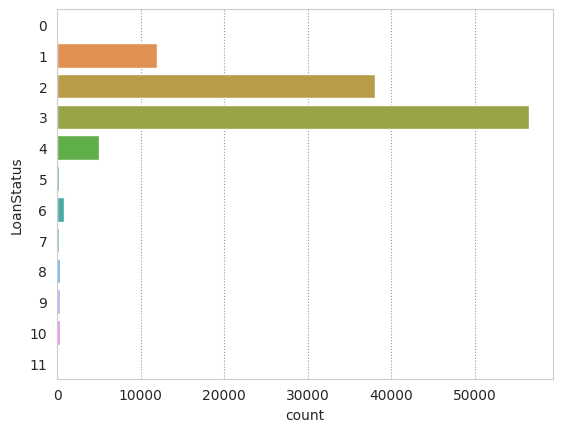

In [43]:
#Reading the histogram of the loanStatus
sns.set_style("whitegrid", {"grid.color": ".6", "grid.linestyle": ":"})
sns.countplot(y='LoanStatus',data=result)

<Axes: xlabel='count', ylabel='EmploymentStatus'>

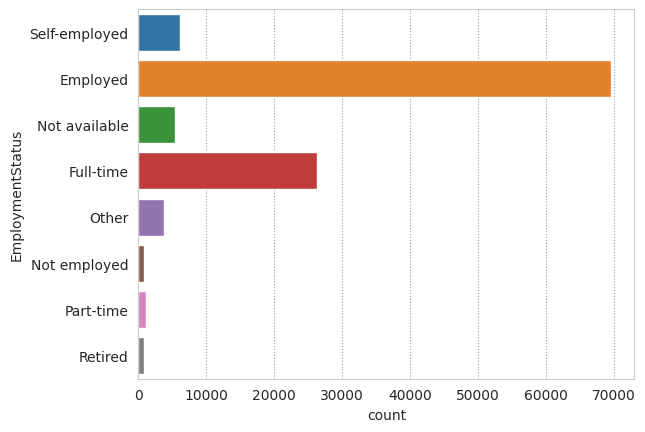

In [44]:
#Reading the histogram of the employeementStatus
sns.set_style("whitegrid", {"grid.color": ".6", "grid.linestyle": ":"})
sns.countplot(y='EmploymentStatus',data=result)

0=Self-employed, 1=Employed, 2=Not availabel, 3=Full-time, 4=Other, 5=Not employed, 6=Part-time, 7=Retired

Univariate 

**Research Question 1 : What are the most number of borrowers Credit Grade?**

<Axes: xlabel='count', ylabel='CreditGrade'>

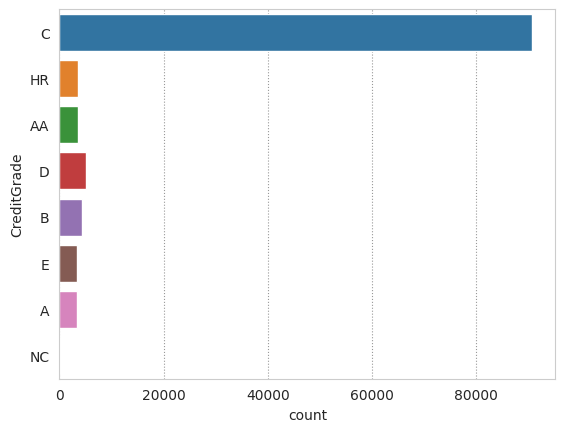

In [45]:
# Check the univariate relationship of Credit Grade
sns.set_style("whitegrid", {"grid.color": ".6", "grid.linestyle": ":"})
sns.countplot(y='CreditGrade',data=result)

**Research Question 2 : Since there are so much low Credit Grade such as C and D , does it lead to a higher amount of deliquency?**

<Axes: >

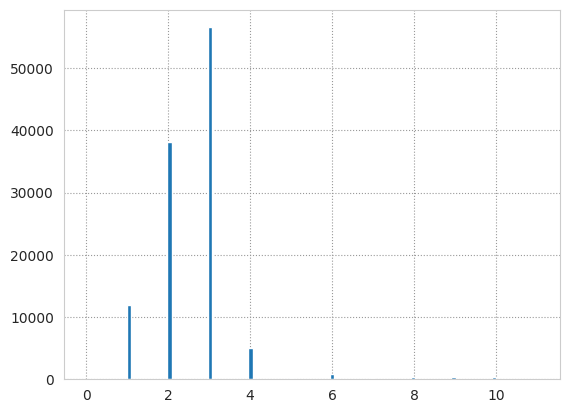

In [46]:
# Check the univariate relationship of Loan Status
result['LoanStatus'].hist(bins=100)

**Research Question 3 : What is the highest number of BorrowerRate?**

21962.95845

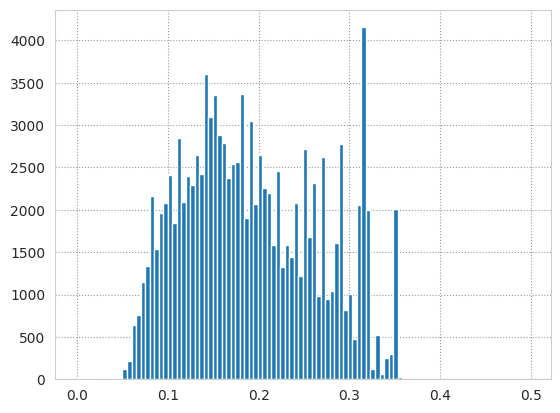

In [47]:
# Check the univariate relationship of Borrower rate
result['BorrowerRate'].hist(bins=100)
result['BorrowerRate'].sum()

**Research Question 4 : Since the highest number of Borrower Rate is between 0.1 and 0.2, does the highest number of Lender Yield is between 0.1 and 0.2?**

<Axes: >

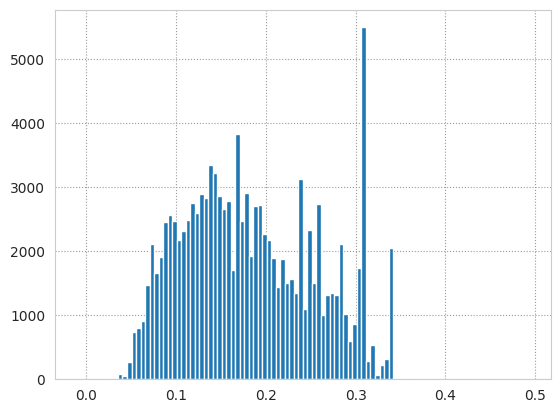

In [48]:
# Check the univariate relationship of Lender Yield on Loan
result['LenderYield'].hist(bins=100)

# **BiVariate**

**Research Question 5 : Is the Credit Grade really accurate? Does higher Credit Grade leads to higher Monthly Loan Payment? As for Higher Credit Grade we mean from Grade AA to B**

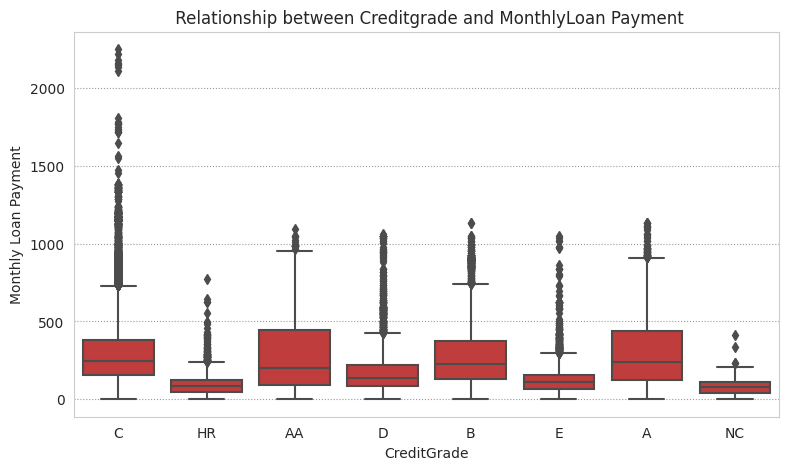

In [49]:
# Check the Bivariate Relationship between CreditGarde and MonthlyLoan Payment
base_color = sns.color_palette()[3]
plt.figure(figsize = [20, 5])
plt.subplot(1, 2, 2)
sns.boxplot(data=result,x='CreditGrade',y='MonthlyLoanPayment',color=base_color);
plt.xlabel('CreditGrade');
plt.ylabel('Monthly Loan Payment');
plt.title(' Relationship between Creditgrade and MonthlyLoan Payment');

**Research Question 6 : Here we look at the Completed Loan Status and Defaulted Rate to determine the accuracy of Credit Grade.**

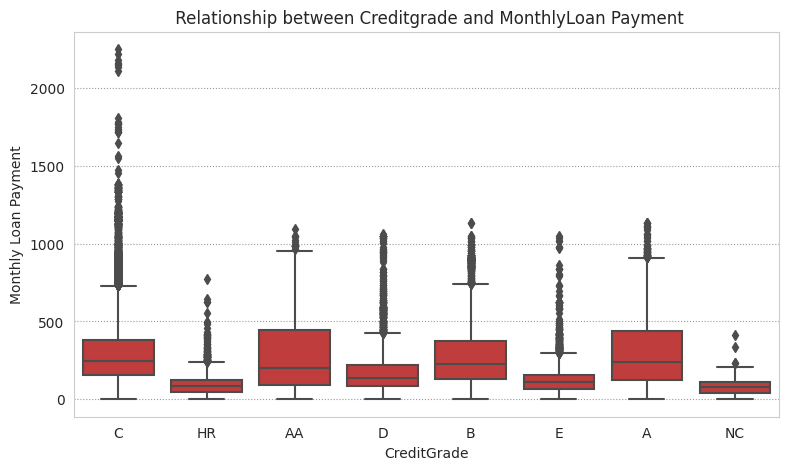

In [50]:
 # Check the Bivariate Relatonship between CreditGrade and LoanStatus
base_color = sns.color_palette()[3]
plt.figure(figsize = [20, 5])
plt.subplot(1, 2, 2)
sns.boxplot(data=result,x='CreditGrade',y='MonthlyLoanPayment',color=base_color);
plt.xlabel('CreditGrade');
plt.ylabel('Monthly Loan Payment');
plt.title(' Relationship between Creditgrade and MonthlyLoan Payment');

# **Multivariate**

**Research Question 7 : Now we know the Credit Grade is accurate and is a tool that is used by the organization in determining the person’s creditworthiness. Now we need to understand does the ProsperScore, the custom built risk assesment system is being used in determing borrower’s rate?**

From a theoretical standpoint, if the higher ProsperScore leads to lower Borrower Rate and Borrower Annual Percentage Rate that means the Prosper Score is being used alongside the Credit Grade in determing a person’s creditworthiness.

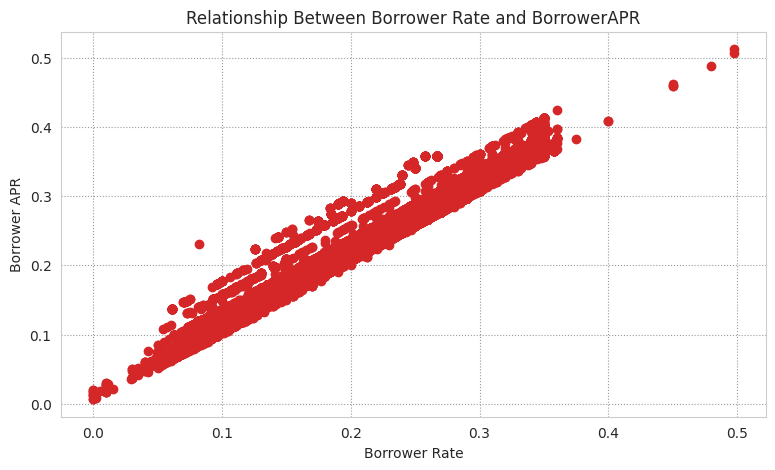

In [51]:
# Check the Multivariate Relationship between BorrowerRate and BorrowerAPR.
plt.figure(figsize = [20, 5])
plt.subplot(1, 2, 1)
plt.scatter(data=df,x='BorrowerRate',y='BorrowerAPR',color=base_color);
plt.xlabel('Borrower Rate');
plt.ylabel('Borrower APR');
plt.title('Relationship Between Borrower Rate and BorrowerAPR');

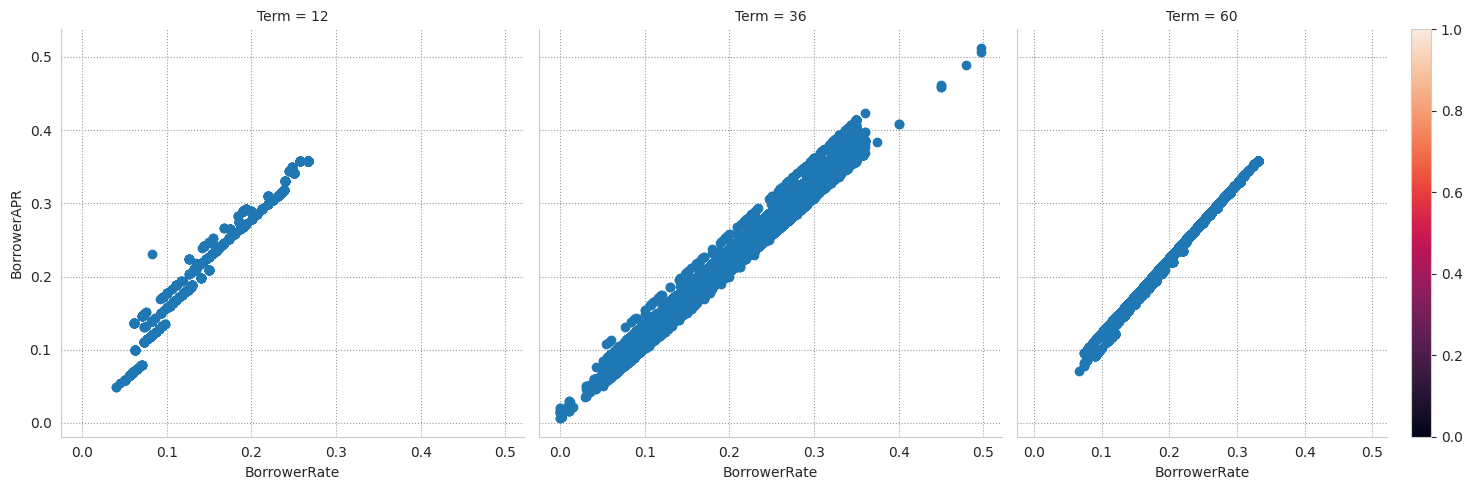

In [52]:
g = sns.FacetGrid(data = df, col = 'Term', height = 5,
                margin_titles = True)
g.map(plt.scatter, 'BorrowerRate', 'BorrowerAPR');
plt.colorbar()

## **Applying Machine Learning Algorithms**

### **Linear Regression Model**

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X = df_loan.drop(columns=['LoanStatus'])
y = df_loan['LoanStatus']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared: {r2}")

Mean Squared Error: 0.7374069108540152
Root Mean Squared Error: 0.8587240015592992
R-squared: 0.30968579059777923


# **Feature Engineering**

## **Feature Scaling**

In [54]:
scaler = StandardScaler()
result[numerical.columns] = scaler.fit_transform(result[numerical.columns])
result[numerical.columns]

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors,DaysSinceCreation
0,-1.325176,-0.462837,-0.014820,-0.464648,-0.599888,1.708073,1.708073,1.708073,1.708073,1.708073,...,0.130389,-0.293257,-0.289086,-0.09121,0.07905,-0.144505,-0.100943,-0.056191,1.719559,0.0
1,1.773258,-0.462837,-0.014826,-1.346787,-1.351410,-0.585455,-0.585455,-0.585455,-0.585448,-0.585451,...,0.130389,-0.293257,-0.289086,-0.09121,0.07905,-0.144505,-0.100943,-0.056191,-0.769821,0.0
2,-1.664772,-0.462837,-0.014807,1.099145,0.768955,1.708073,1.708073,1.708073,1.708073,1.708073,...,0.130389,-0.293257,-0.289086,-0.09121,0.07905,-0.144505,-0.100943,-0.056191,-0.382369,0.0
3,0.092145,-0.462837,-0.014825,-1.274612,-1.278942,-0.585455,-0.585455,-0.585455,-0.585448,-0.585443,...,0.130389,-0.293257,-0.289086,-0.09121,0.07905,-0.144505,-0.100943,-0.056191,0.750928,0.0
4,0.858275,-0.462837,-0.014811,0.210323,0.212024,-0.585455,-0.585455,-0.585455,-0.585459,-0.585462,...,0.130389,-0.293257,-0.289086,-0.09121,0.07905,-0.144505,-0.100943,-0.056191,-0.585781,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113932,0.381624,-0.462837,-0.014814,-0.085060,-0.084559,-0.585455,-0.585455,-0.585455,-0.585455,-0.585459,...,0.130389,-0.293257,-0.289086,-0.09121,0.07905,-0.144505,-0.100943,-0.056191,-0.769821,0.0
113933,-0.276369,-0.462837,-0.014824,-1.092838,-1.096429,-0.585455,-0.585455,-0.585455,-0.585448,-0.585447,...,0.130389,-0.293257,-0.289086,-0.09121,0.07905,-0.144505,-0.100943,-0.056191,-0.566409,0.0
113934,1.345097,1.836858,-0.014812,0.297200,0.299254,-0.585455,-0.585455,-0.585455,-0.585459,-0.585466,...,0.130389,-0.293257,-0.289086,-0.09121,0.07905,-0.144505,-0.100943,-0.056191,0.373163,0.0
113935,-0.270760,1.836858,-0.014807,0.905342,0.909865,-0.585455,-0.585455,-0.585455,-0.585455,-0.585459,...,0.130389,-0.293257,-0.289086,-0.09121,0.07905,-0.144505,-0.100943,-0.056191,1.874540,0.0


## **Correlation Matrix with Heatmap:**

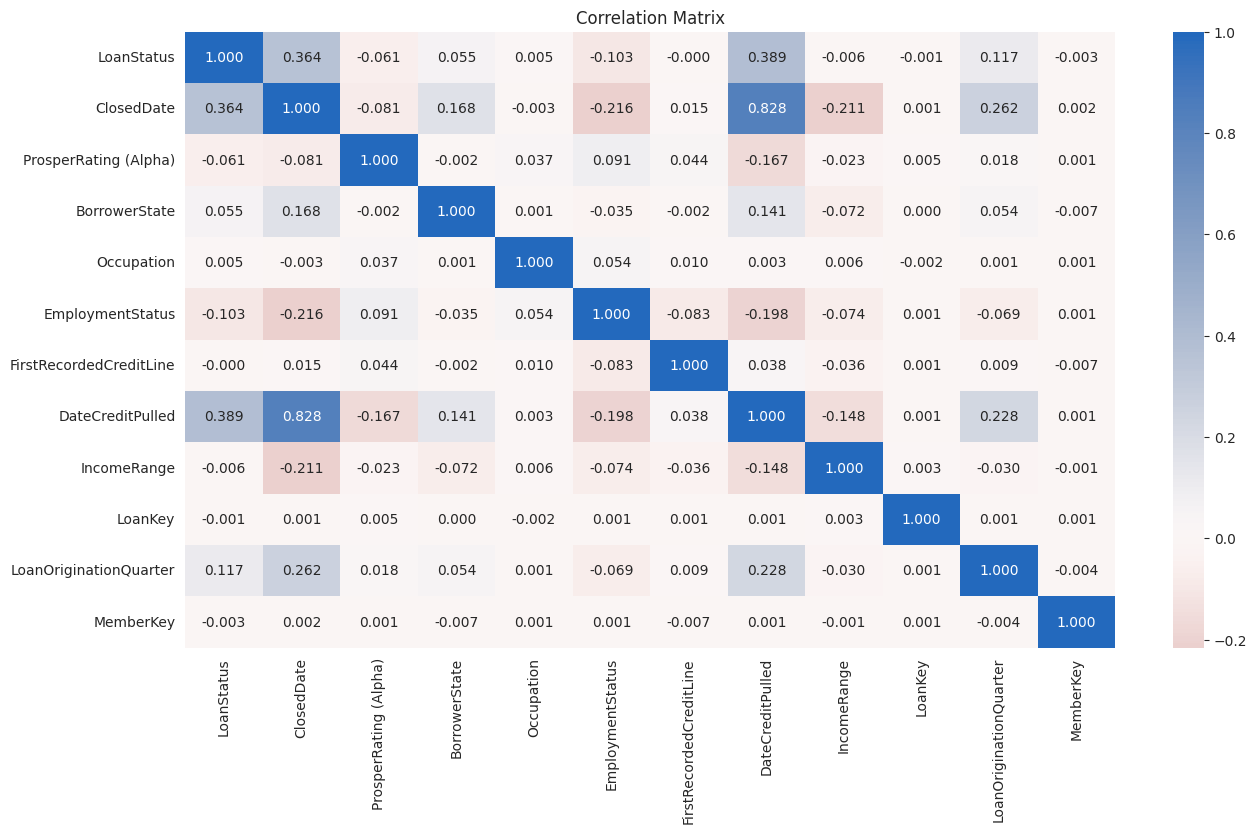

In [55]:
# Matrix of correlations for all numerical variables
plt.figure(figsize = [15, 8])
sns.heatmap(df_loan[cols].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.title('Correlation Matrix') 
plt.margins(x = 0.5, y= 0.3)
plt.show()

## **Univariate selection**

In [56]:
X = result[numerical.columns]
y = result['LoanStatus']

# Select the top 10 features based on ANOVA F-value
best_features = SelectKBest(score_func=f_classif, k=10)
X_new = best_features.fit_transform(X, y)
X_new

array([[-1.32517553,  1.70807341,  1.70807341, ..., -1.29214167,
        -0.29325743, -0.28908578],
       [ 1.77325815, -0.58545514, -0.58545509, ...,  1.67916792,
        -0.29325743, -0.28908578],
       [-1.66477187,  1.70807341,  1.70807341, ..., -1.61772347,
        -0.29325743, -0.28908578],
       ...,
       [ 1.34509664, -0.58545484, -0.58545497, ...,  1.37881069,
        -0.29325743, -0.28908578],
       [-0.27076049, -0.58545491, -0.58545469, ..., -0.33504677,
        -0.29325743, -0.28908578],
       [ 1.56125162, -0.58545512, -0.58545506, ...,  1.49147355,
        -0.29325743, -0.28908578]])

## **Feature selection**

In [57]:
from sklearn.feature_selection import SelectKBest, f_regression

# Select the top k features
k = 10  # You can choose the number of features you want to keep
selector = SelectKBest(score_func=f_regression, k=k)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

# Get the selected feature names
selected_feature_names = X.columns[selector.get_support()]
selected_feature_names

Index(['ListingNumber', 'EstimatedEffectiveYield', 'TradesOpenedLast6Months',
       'DebtToIncomeRatio', 'StatedMonthlyIncome', 'TotalProsperLoans',
       'ProsperPaymentsOneMonthPlusLate', 'LoanFirstDefaultedCycleNumber',
       'LP_ServiceFees', 'PercentFunded'],
      dtype='object')

## **Extra Trees Classifier Method**

In [58]:
model = ExtraTreesClassifier()
model.fit(X, y)

# Feature importances
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

# Print the top 10 features
top_features = X.columns[indices][:10]
print(top_features)

Index(['LoanFirstDefaultedCycleNumber', 'LoanCurrentDaysDelinquent',
       'LoanMonthsSinceOrigination', 'LP_CustomerPrincipalPayments',
       'ListingNumber', 'LoanNumber', 'LP_CustomerPayments',
       'ProsperRating (numeric)', 'EstimatedLoss', 'EstimatedEffectiveYield'],
      dtype='object')


## **Mutual Information Selection**

In [59]:
# Apply Mutual Information feature selection
k = 10  # Specify the number of features you want to keep
mi_selector = SelectKBest(score_func=mutual_info_regression, k=k)
X_selected = mi_selector.fit_transform(X, y)

# Get the selected feature names
selected_feature_names = X.columns[mi_selector.get_support()]
selected_feature_names

Index(['ListingNumber', 'BorrowerAPR', 'EstimatedEffectiveYield',
       'EstimatedLoss', 'EstimatedReturn', 'LoanCurrentDaysDelinquent',
       'LoanFirstDefaultedCycleNumber', 'LoanMonthsSinceOrigination',
       'LoanNumber', 'LP_CustomerPrincipalPayments'],
      dtype='object')

## **Creating Features**

In [60]:
result['DebtToIncomeRatio'] = result['MonthlyLoanPayment'] / result['StatedMonthlyIncome']
result['DebtToIncomeRatio']

0        -0.890870
1         3.487335
2         1.642315
3        -0.695443
4         2.845750
            ...   
113932   -2.809089
113933   -3.299542
113934   -0.012414
113935   -3.965408
113936    7.861778
Name: DebtToIncomeRatio, Length: 113937, dtype: float64

## **Clustering with K-Means**

In [61]:
kmeans = KMeans(n_clusters=3)
result['Cluster'] = kmeans.fit_predict(X)
result['Cluster']

0         1
1         1
2         2
3         1
4         0
         ..
113932    1
113933    0
113934    1
113935    0
113936    1
Name: Cluster, Length: 113937, dtype: int32

## **Principal Component Analysis (PCA)**

Use PCA to reduce dimensionality while preserving as much variance as possible.

In [62]:
pca = PCA(n_components=10)
X_pca = pca.fit_transform(X_train_selected)
X_tpca = pca.transform(X_test_selected)

# Convert to dataframe
component_names = [f"PC{i+1}" for i in range(X_pca.shape[1])]
X_pca = pd.DataFrame(X_pca, columns=component_names)

X_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,-390732.632535,15626.496191,89638.085274,978.169551,1088.229300,-135.200928,-1691.048809,18.209412,-8.374414,-0.166887
1,-85519.337113,-68732.296348,-142686.471243,2707.774855,7109.635068,-369.152480,-5.819782,213.811858,231.382595,3.902952
2,603531.602391,-259954.138619,77532.923667,3035.617584,4097.081992,-109.675498,264.195208,162.375826,538.174862,2.099148
3,-86321.894528,-68451.963650,-142046.588326,3223.537970,-1924.113569,28.301757,-274.816641,44.614618,-267.316661,1.172043
4,803864.827767,307806.490866,47853.004182,3164.517527,-145.451859,1993.209135,-2134.404944,-661.371918,468.365525,-1.397255


### **Random Forest Model**

In [63]:
# Create and train the Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_pca, y_train)

# Make predictions
y_pred = rf_regressor.predict(X_tpca)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 0.1311229945585396


### **Gradient Boosting Regressor model**

In [64]:
# Create and train the Gradient Boosting Regressor
gb_regressor = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_regressor.fit(X_pca, y_train)

# Make predictions
y_pred_gb = gb_regressor.predict(X_tpca)

# Evaluate the model
mse_gb = mean_squared_error(y_test, y_pred_gb)
print(f"Mean Squared Error (Gradient Boosting): {mse_gb}")

Mean Squared Error (Gradient Boosting): 0.34676130374844666


In [65]:
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)


def plot_variance(pca, width=8, dpi=100):
    # Create figure
    fig, axs = plt.subplots(1, 2)
    n = pca.n_components_
    grid = np.arange(1, n + 1)
    # Explained variance
    evr = pca.explained_variance_ratio_
    axs[0].bar(grid, evr)
    axs[0].set(
        xlabel="Component", title="% Explained Variance", ylim=(0.0, 1.0)
    )
    # Cumulative Variance
    cv = np.cumsum(evr)
    axs[1].plot(np.r_[0, grid], np.r_[0, cv], "o-")
    axs[1].set(
        xlabel="Component", title="% Cumulative Variance", ylim=(0.0, 1.0)
    )
    # Set up figure
    fig.set(figwidth=8, dpi=100)
    return axs


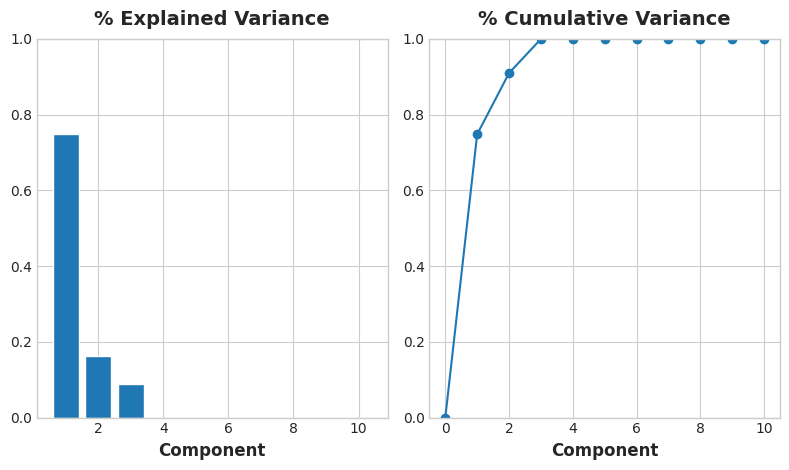

In [66]:
# Look at explained variance
plot_variance(pca);